In [91]:
import numpy as np
import pandas as pd
import matplotlib as plt
import math

In [92]:
df = pd.read_csv('./Pokemon.csv')
df2 =  df.sort_values("Type 1")
df.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [93]:
df2.head()
df2 = df[df['Type 1'] =='Water']
df_water_train = df2.iloc[0:60]
df_water_test = df2.iloc[60:112]

df3 = df[df['Type 1'] =='Normal']
df_Normal_train = df3.iloc[0:50]
df_Normal_test = df3.iloc[50:98]

test = pd.concat([df_water_test,df_Normal_test],axis=0)

In [94]:
test.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
349,319,SharpedoMega Sharpedo,Water,Dark,560,70,140,70,110,65,105,3,False
350,320,Wailmer,Water,NaN,400,130,70,35,70,35,60,3,False
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
371,339,Barboach,Water,Ground,288,50,48,43,46,41,60,3,False
372,340,Whiscash,Water,Ground,468,110,78,73,76,71,60,3,False


In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

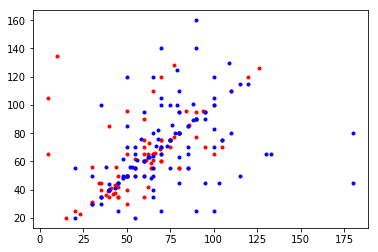

In [96]:
matrix_mean_water = [df.loc[df['Type 1'] == 'Water','Total'].mean(),
                     df.loc[df['Type 1'] == 'Water','HP'].mean(),
                     df.loc[df['Type 1'] == 'Water','Attack'].mean(),
                     df.loc[df['Type 1'] == 'Water','Defense'].mean(),
                     df.loc[df['Type 1'] == 'Water','Sp. Atk'].mean(),
                     df.loc[df['Type 1'] == 'Water','Sp. Def'].mean(),
                     df.loc[df['Type 1'] == 'Water','Speed'].mean()]


matrix_mean_normal = [df.loc[df['Type 1'] == 'Normal','Total'].mean(),
                      df.loc[df['Type 1'] == 'Normal','HP'].mean(),
                      df.loc[df['Type 1'] == 'Normal','Attack'].mean(),
                      df.loc[df['Type 1'] == 'Normal','Defense'].mean(),
                      df.loc[df['Type 1'] == 'Normal','Sp. Atk'].mean(),
                      df.loc[df['Type 1'] == 'Normal','Sp. Def'].mean(),
                      df.loc[df['Type 1'] == 'Normal','Speed'].mean(),]





plt.plot(df[df['Type 1'] == 'Normal']['Defense'],df[df['Type 1'] == 'Normal']['Sp. Def'],'r.',
         df[df['Type 1'] == 'Water']['Defense'],df[df['Type 1'] == 'Water']['Sp. Def'],'b.',
       )

#plt.plot(matrix_mean_water[0],matrix_mean_water[1],'bd',matrix_mean_normal[0],matrix_mean_normal[1],'rd',markersize=19,)

In [97]:
print('water mean',matrix_mean_water)
print('Normal mean',matrix_mean_normal)

water mean [430.45535714285717, 72.0625, 74.15178571428571, 72.94642857142857, 74.8125, 70.51785714285714, 65.96428571428571]
Normal mean [401.68367346938777, 77.27551020408163, 73.46938775510205, 59.8469387755102, 55.816326530612244, 63.724489795918366, 71.55102040816327]


In [98]:
#df[df['Type 1'] == 'Water']['Defense'].count
number_of_Water = 60
number_of_normal = 50
number_of_total = number_of_Water + number_of_normal
P_c1 = number_of_Water/number_of_total
P_c2 = number_of_normal/number_of_total
print(P_c1)
print(P_c2)

0.5454545454545454
0.45454545454545453


In [99]:
df_water_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 9 to 348
Data columns (total 13 columns):
#             60 non-null int64
Name          60 non-null object
Type 1        60 non-null object
Type 2        33 non-null object
Total         60 non-null int64
HP            60 non-null int64
Attack        60 non-null int64
Defense       60 non-null int64
Sp. Atk       60 non-null int64
Sp. Def       60 non-null int64
Speed         60 non-null int64
Generation    60 non-null int64
Legendary     60 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 6.2+ KB


# P(x|C1) Water Trainning model

In [100]:
Total_matrix_water =   np.array(df_water_train['Total']-matrix_mean_water[0])
HP_matrix_water =      np.array(df_water_train['HP']-matrix_mean_water[1])
Attack_matrix_water =  np.array(df_water_train['Attack']-matrix_mean_water[2])
Defense_matrix_water = np.array(df_water_train['Defense']-matrix_mean_water[3])
SpAtk_matrix_water =   np.array(df_water_train['Sp. Atk']-matrix_mean_water[4])
SpDef_matrix_water =   np.array(df_water_train['Sp. Def']-matrix_mean_water[5])
Speed_matrix_water =   np.array(df_water_train['Speed']-matrix_mean_water[6])

combined_water = np.vstack((Total_matrix_water,
                            HP_matrix_water,
                            Attack_matrix_water,
                            Defense_matrix_water,
                            SpAtk_matrix_water,
                            SpDef_matrix_water,
                            Speed_matrix_water)).T

x_matrix_total_water = np.zeros([7, 7]) 
for i in range(number_of_Water): 
    
    x_matrix_water = np.mat(combined_water[i])
    x_matrix_total_water = x_matrix_total_water + np.dot(x_matrix_water.T,x_matrix_water)
x_matrix_total_water = x_matrix_total_water/number_of_Water


# P(x|C2) Normal Trainning model

In [101]:
Total_matrix_normal =   np.array(df_Normal_train['Total']-matrix_mean_normal[0])
HP_matrix_normal =      np.array(df_Normal_train['HP']-matrix_mean_normal[1])
Attack_matrix_normal =  np.array(df_Normal_train['Attack']-matrix_mean_normal[2])
Defense_matrix_normal = np.array(df_Normal_train['Defense']-matrix_mean_normal[3])
SpAtk_matrix_normal =   np.array(df_Normal_train['Sp. Atk']-matrix_mean_normal[4])
SpDef_matrix_normal =   np.array(df_Normal_train['Sp. Def']-matrix_mean_normal[5])
Speed_matrix_normal =   np.array(df_Normal_train['Speed']-matrix_mean_normal[6])

combined_normal = np.vstack((Total_matrix_normal,
                             HP_matrix_normal,
                             Attack_matrix_normal,
                             Defense_matrix_normal,
                             SpAtk_matrix_normal,
                             SpDef_matrix_normal,
                             Speed_matrix_normal)).T

x_matrix_total_normal = np.zeros([7, 7]) 
for i in range(number_of_normal): 
    
    x_matrix_normal = np.mat(combined_normal[i])
    x_matrix_total_normal = x_matrix_total_normal + np.dot(x_matrix_normal.T,x_matrix_normal)
x_matrix_total_normal = x_matrix_total_normal/number_of_normal




In [102]:
total_matrix = ((5/11)*(x_matrix_total_normal)) + ((6/11)*(x_matrix_total_water))
inverse = np.linalg.inv(total_matrix)

In [103]:
inverse

matrix([[-2.88396493e+11,  2.88396493e+11,  2.88396493e+11,
          2.88396493e+11,  2.88396493e+11,  2.88396493e+11,
          2.88396493e+11],
        [ 2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11],
        [ 2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11],
        [ 2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11],
        [ 2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11],
        [ 2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11],
        [ 2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11, -2.88396493e+11, -2.88396493e+11

In [104]:
inverse_normal

matrix([[-2.88396493e+11,  2.88396493e+11,  2.88396493e+11,
          2.88396493e+11,  2.88396493e+11,  2.88396493e+11,
          2.88396493e+11],
        [ 2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11],
        [ 2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11],
        [ 2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11],
        [ 2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11],
        [ 2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11],
        [ 2.88396493e+11, -2.88396493e+11, -2.88396493e+11,
         -2.88396493e+11, -2.88396493e+11, -2.88396493e+11

# Classification

In [109]:
def Classification(x,result,index) : 
    
    
    x = np.mat(x)
    matrix_water = np.dot(np.dot((x-matrix_mean_water),inverse),(x-matrix_mean_water).T)
    e_c1 = math.exp(-0.5*matrix_water)
    absdet_c1 = math.sqrt(abs(np.linalg.det(total_matrix)))
    pi = (math.pi)**(7/2)
    P_x_C1 = e_c1/(absdet_c1*pi)
    
    matrix_normal = np.dot(np.dot((x-matrix_mean_normal),inverse),(x-matrix_mean_normal).T)
    e_c2= (math.exp(-0.5*matrix_normal))
    absdet_c2 = math.sqrt(abs(np.linalg.det(total_matrix)))
    P_x_C2 = e_c2/(absdet_c2*pi)
              
    probability_c1_x=(P_x_C1*P_c1)/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    probability_c2_x=(P_x_C2*P_c2)/((P_x_C2*P_c2)+(P_x_C1*P_c1))
    '''
    print('matrix_water : ', matrix_water)
    print('matrix_normal : ', matrix_normal)
    '''
    print('P_x_C1 : ', probability_c1_x)
    print('P_x_C2 : ', probability_c2_x)   
    
    
    if probability_c1_x > 0.5 :
        result.append('Water')
        print('water class probability : ',probability_c1_x)
    else:
        result.append('Normal')
        print('Normal class probability: ',probability_c2_x)
    
    return result

In [110]:
test['pre']='NaN'

In [111]:
#x_test = [73.31884057971014,69.08695652173913]
Total_matrix_water_test =   np.array(test['Total'])
HP_matrix_water_test =      np.array(test['HP'])
Attack_matrix_water_test =  np.array(test['Attack'])
Defense_matrix_water_test = np.array(test['Defense'])
SpAtk_matrix_water_test =   np.array(test['Sp. Atk'])
SpDef_matrix_water_test =   np.array(test['Sp. Def'])
Speed_matrix_water_test =   np.array(test['Speed'])

combined_water_test = np.vstack((Total_matrix_water_test,
                                 HP_matrix_water_test,
                                 Attack_matrix_water_test,
                                 Defense_matrix_water_test,
                                 SpAtk_matrix_water_test,
                                 SpDef_matrix_water_test,
                                 Speed_matrix_water_test)).T

result = []

for i in range(100): 
    #result.append(Classification(combined_water[i],df_water_test,i))
    re = Classification(combined_water_test[i],result,i)
#print(result)
#print(result[0])
#dff.iloc[:][13] = range(52)
#print(result/number_of_Water)

P_x_C1 :  0.5406942454889588
P_x_C2 :  0.4593057545110412
water class probability :  0.5406942454889588
P_x_C1 :  0.2371565108424731
P_x_C2 :  0.762843489157527
Normal class probability:  0.762843489157527
P_x_C1 :  0.33399911713219577
P_x_C2 :  0.6660008828678043
Normal class probability:  0.6660008828678043
P_x_C1 :  0.550334246130626
P_x_C2 :  0.44966575386937396
water class probability :  0.550334246130626
P_x_C1 :  0.5352402415188322
P_x_C2 :  0.46475975848116785
water class probability :  0.5352402415188322
P_x_C1 :  0.6753443393048781
P_x_C2 :  0.32465566069512186
water class probability :  0.6753443393048781
P_x_C1 :  0.7893213598823958
P_x_C2 :  0.21067864011760412
water class probability :  0.7893213598823958
P_x_C1 :  0.3684285675007241
P_x_C2 :  0.6315714324992759
Normal class probability:  0.6315714324992759
P_x_C1 :  0.8591007721696683
P_x_C2 :  0.14089922783033168
water class probability :  0.8591007721696683
P_x_C1 :  0.9154451415098418
P_x_C2 :  0.08455485849015809
wat

In [112]:
test['pre'] = re
(test['Type 1'] == test['pre']).sum()

76